# Исследование данных о российском кинопрокате

**Цель исследования:**
выявление текущих трендов рынка российского кинопроката и анализ популярности фильмов с государственной поддержкой для Министерства культуры РФ. 

**Задачи исследования:**
- проведение предобработки и исследовательского анализа данных о фильмах;
- анализ успешности фильмов с государственным участием;
- вывод о популярных трендах на рынке российского кинопроката, а также рекомендации для заказчика (Минкультуры РФ).

**Источники исследования**:
данные, опубликованные на портале открытых данных Министерства культуры (https://opendata.mkrf.ru): информация о прокатных удостоверениях, сборах и государственной поддержке фильмов; а также информация с сайта КиноПоиск.

## Предобработка данных

### Загрузка и обзор данных

Импортируем библиотеки, загрузим данные двух датасетов и выведем общую информацию на экран.

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
try:
    mkrf_movies = pd.read_csv('/Users/uliakomlenok/datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
try:
    mkrf_shows = pd.read_csv('/Users/uliakomlenok/datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
mkrf_movies.head().T

,0,1,2,3,4
title,Открытый простор,Особо важное задание,Особо опасен,Особо опасен,Особо опасен
puNumber,221048915,111013716,221038416,221026916,221030815
show_start_date,2015-11-27T12:00:00.000Z,2016-09-13T12:00:00.000Z,2016-10-10T12:00:00.000Z,2016-06-10T12:00:00.000Z,2015-07-29T12:00:00.000Z
type,Художественный,Художественный,Художественный,Художественный,Художественный
film_studio,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...","Киностудия ""Мосфильм""","Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...","Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...","Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл..."
production_country,США,СССР,США,США,США
director,Кевин Костнер,Е.Матвеев,Тимур Бекмамбетов,Тимур Бекмамбетов,Тимур Бекмамбетов
producer,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",NaN,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит"
age_restriction,«18+» - запрещено для детей,«6+» - для детей старше 6 лет,«18+» - запрещено для детей,«18+» - запрещено для детей,«18+» - запрещено для детей
refundable_support,NaN,NaN,NaN,NaN,NaN


In [5]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Выведем основную информацию о датафреймах.

In [6]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В базе `mkrf_movies` 7486 строк с данными:

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

В базе `mkrf_shows` 3158 строк с данными:

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

Из общей информации о датасетах видно, что объединить обе базы возможно только после приведения столбцов `puNumber` к одному типу данных.
Приведем указанный столбец к строкам.

In [8]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('str')

In [9]:
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('str')

Объединим два датасета в один по общему столбцу с номером прокатного удостоверения `puNumber`.

In [10]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='outer')

Убедимся в корректности объединения двух датасетов. Кроме того, количество строк общего датафрейма не изменилось, значит - строк с новыми прокатными удостоверениями добавлено не было.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

По итогам предварительного анализа, очевидна необходимость правок типов данных (в которых необходимо выделить временной тип), обработать пропуски, проверить данные на дубликаты и возможные ошибки.

### Проверка типов данных

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изменим тип данных столбцов с датой премьеры фильма и с рейтингами.

1. В первом случае изменим данные в столбце `show_start_date` с `object` на `datetime` с целью распознавания данного столбца для работы.

In [13]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

2. В случае с рейтингами изменим категориальный тип данных на вещественные числа, поскольку операции с рейтингом предполагают такие математические действия, как сравнение, выбор диапазонов значений и пр.

In [14]:
# Рассмотрим уникальные значения столбца с рейтингом и найдем проблему в данных: некоторые содержат знак %,
# что делает невозможным преобразование типа.

data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [15]:
# Избавимся от знака % и преобразуем тип данных столбца с рейтингами одновременно.

data['ratings'] = data['ratings'].str.replace('%', '').astype(float)

In [16]:
data['ratings'].sort_values().unique()

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2.1,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,
        4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,
        5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,
        7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
        9. ,  9.1,  9.2, 19. , 28. , 62. , 64. , 79. , 83. , 88. , 89. ,
       90. , 91. , 94. , 97. , 98. , 99. ,  nan])

Избавившись от знака процентов, мы получили значения рейтингов больше 10 в соответствующих строках.

Убедимся на примерах строк с максимальным значением 99 в столбце рейтинга в том, что оно относится не к рейтингу, а, вероятно, к показателю ожидания фильмов, сравнив рейтинги с данными с сайта Кинопоиск.ру.

In [17]:
data.loc[data['ratings'] == 99]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99.00,"ужасы,триллер,драма",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99.00,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99.00,"аниме,мультфильм,ужасы",4295.00
6882,Животные рядом со Святыми,112003719,2019-05-03 12:00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,99.00,"криминал,драма",NaN


Рассчитаем, как много похожих данных в строках, где имеются финансовые сведения, с которыми предстоит работать в дальнейшем.

In [18]:
# Рассчитаем количество данных с ошибочными значениями рейтинга в строках, где есть финансовые данные, чтобы 
# проанализировать, насколько критично их редактирование.

data.loc[(data['ratings']>10) & ((data['box_office']>=0)|(data['budget']>=0)), 'ratings'].count()

15

15 строк с ошибочными значениями рейтинга при их удалении не представят проблемы для выборки фильмов с финансовыми сведениями, однако могут представлять проблему для выборки фильмов с господдержкой. Проверим, сколько строк относятся к ним.

In [19]:
data.loc[(data['ratings']>10) & (data['budget']>=0)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2146,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,10000000.00,40000000.00,Министерство культуры,94.00,"фантастика,боевик,комедия",334750.00
3139,Я умею вязать,111019615,2015-11-27 12:00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,4700000.00,14462464.00,Министерство культуры,90.00,драма,801370.00


Заменим значения рейтинга в найденных двух строках на сведения с сайта Кинопоиск.ру и Imdb, а прочие аномальные значения рейтинга удалим (сделаем пропущенными, чтобы не терять прочие сведения).

In [20]:
data.loc[data['puNumber'] == '111003415', 'ratings'] = 5.8

In [21]:
data.loc[data['puNumber'] == '111019615', 'ratings'] = 6.9

In [22]:
# Удалим недостоверные значения рейтингов в прочих строках.

data.loc[data['ratings']>10, 'ratings'] = None

После преобразований проверим наличие изменений типов данных.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

### Обработка пропусков

Проверим наличие пропусков в данных.

In [24]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   994
genres                    976
box_office               4328
dtype: int64

Для целей исследования мы не будем заполнять пропуски в категориальных данных там, где их небольшое количество, по причине времязатратности и отсутствия существенного эффекта пропусков в столбцах `film_studio`, `production_country`, `director` на результаты анализа.

Мы также не будем заполнять пропуски в прочих категориальных столбцах, поскольку на предварительном этапе не готовы определить пользу их для целей нашего исследования.

Пропуски в количественном столбце о сборах являются полностью случайными и связаны с внешним фактором (предоставленные исходные данные), на который мы в рамках данного исследования повлиять не можем. Кроме того, пропуски в стобцах с бюджетным финансированием являются обоснованными: зачастую они означают, что поддержки государства у фильмов не было. Пропуски в связанных со столбцом `budget` данных о расходах и источниках являются случайными, но зависят от бюджета. Пропуски в стобце `ratings` рассмотрим на предмет заполнения на этапе дальнейшего исследования.

### Обработка дубликатов

Проверим количество полных дубликатов.

In [25]:
data.duplicated().sum()

0

Явных дубликатов не выявлено. Проверим на дубликаты отдельно столбец с уникальными значениями номеров прокатного удостоверения, чтобы проверить строки на предмет неявных дубликатов.

In [26]:
# Удалим из столбца лишние пропуски в случае их наличия.

data['puNumber'] = data['puNumber'].str.strip()

In [27]:
# Проверим, имеются ли дубликаты в столбце puNumber и рассмотрим их детально.

data['puNumber'].value_counts()

puNumber
221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: count, Length: 7484, dtype: int64

Мы видим два случая, когда номер прокатного удостоверения дублируется. В обоих случаях повторяющиеся номера относятся к разным фильмам. Удалять данные строки не корректно и не целесообразно. Дубликаты в номерах могли возникнуть при появлении фильмов-римейков.

In [28]:
# Проанализируем строки с одинаковыми номерами прокатных удостоверений.

data.loc[(data['puNumber']=='221154310') | (data['puNumber']=='221054410')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Кроме того, мы увидели, что в среди номеров прокатных удостоверений есть отсутствующее значение. Оно представлено в единственном числе, в строке нет финансовых данных, и следовательно, она не является помехой в исследовании проката, поэтому мы не удаляем данную строку. 

In [29]:
data.loc[data['puNumber']=='нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),нет,2014-05-15 12:00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Кроме того, проверим на дубликаты столбец с уникальными значениями - названиями кинокартин.

In [30]:
# Удалим из столбца с названиями лишние пропуски в случае их наличия.

data['title'] = data['title'].str.strip()

In [31]:
# Проверим, имеются ли дубликаты в столбце title.

data['title'].value_counts()

title
День святого Валентина_                               5
Кошки против собак: Месть Китти Галор                 4
Знакомство с Факерами 2.                              4
Рапунцель: Запутанная история                         4
Секс в большом городе 2                               4
                                                     ..
МУЛЬТ в кино. Выпуск № 14                             1
Стажёр                                                1
Мэхэббэт - ул йорэк эше (Любовь - это дело сердца)    1
Иван Грозный - 2 серия (восстановленная версия)       1
Машины песенки. Серия "Когда цветут кактусы"          1
Name: count, Length: 6772, dtype: int64

Как видно из анализа, ряд строк имеют дубликаты в названиях. В то же время номера прокатных удостоверений в указанных строках различаются между собой (поскольку все дубликаты в прокатных удостоверениях мы рассмотрели выше). Такая ситуация возможна при неоднократком выходе одной картины в прокат и получения соответствующего номера. Таким образом, мы не обрабатываем дубликаты в названиях, а для целей данного исследования расцениваем каждый показ как отдельное мероприятие.

### Поиск и обработка ошибок

Оценим визуально данные категориальных столбцов на предмет проблем и аномалий.

In [32]:
columns_list=['title', 'puNumber', 'type', 'film_studio', 'production_country', 'director', 'producer', \
              'age_restriction', 'financing_source', 'genres']

for i in data[columns_list]:
    print(i)
    print(data[i].sort_values().unique()[:10])
    print('\n')

title
['"SOS" над тайгой' '"V" значит вендетта'
 '"АРТиШОК" анимационный альманах авторских фильмов'
 '"Бежин луг" Сергея Эйзенштейна' '"Державная" Размышления 100 лет спустя'
 '"Зеленое яблоко" анимационный альманах выпуск № 7'
 '"Машины песенки". Серия "Опять Новый Год!"' '"Море"'
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"'
 '"Старый" Новый год']


puNumber
['111000110' '111000111' '111000112' '111000113' '111000114' '111000115'
 '111000116' '111000117' '111000118' '111000119']


type
[' Анимационный' ' Художественный' 'Анимационный' 'Документальный'
 'Музыкально-развлекательный' 'Научно-популярный' 'Прочие'
 'Художественный']


film_studio
[' АНО "Кинофорум"' ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.'
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"'
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм '
 ' ООО "АВА

In [33]:
# Рассмотрим, сколько уникальных значений в каждом столбце.

data.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    80
genres                    742
box_office               2938
dtype: int64

Мы обнаружили, что в категориальных столбцах встречаются следующие проблемы: наличие лишних знаков и пробелов, дублирование и комбинирование признаков в нескольких строках, что множит количество уникальных значений.

Исправим данные в столбце с типом фильма, избавившись от лишних пропусков.

In [34]:
data['type'] = data['type'].str.strip()

Проверим данные после правки.

In [35]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Рассмотрим распределение количественных столбцов, чтобы выявить аномалии, выбросы и прочие нарушения.

Для удобства анализа финансовых показателей разделим значения столбцов на 1000.

In [36]:
for i in ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']:
    data[i] = data[i]/1000

1. Проанализируем столбец `refundable_support`.

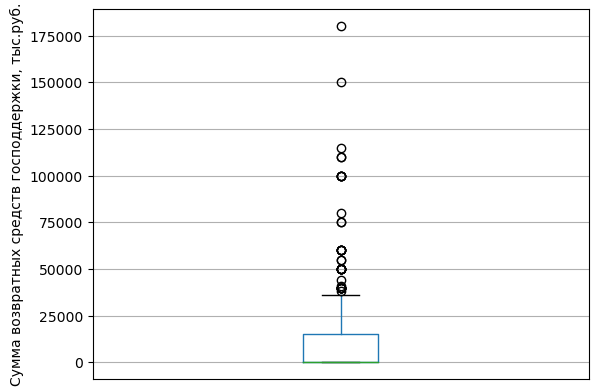

In [37]:
data.boxplot(column='refundable_support')
plt.ylabel('Сумма возвратных средств господдержки, тыс.руб.')
plt.xticks([])
plt.show();

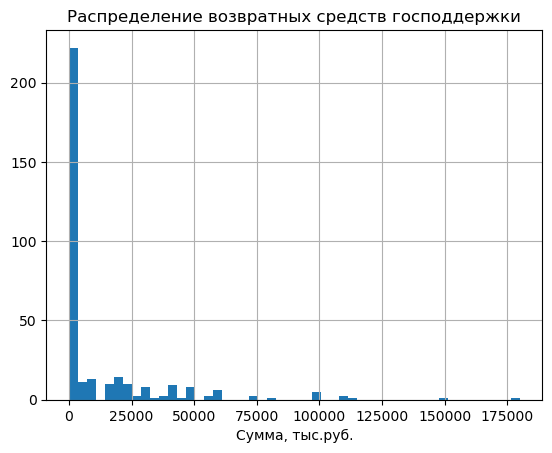

In [38]:
data['refundable_support'].hist(bins=50)
plt.title('Распределение возвратных средств господдержки')
plt.xlabel('Сумма, тыс.руб.')
plt.show();

In [39]:
data['refundable_support'].describe()

count      332.00
mean     11864.46
std      24916.56
min          0.00
25%          0.00
50%          0.00
75%      15000.00
max     180000.00
Name: refundable_support, dtype: float64

Как видно из распределения сумм возвратных средств, основная доля приходится на нулевое значение. Присутствуют аномально высокие значения, значительно превышающие нормальные, которые смещают среднюю величину в бОльшую сторону и увеличивают стандартное отклонение до аномально высокого уровня.

Поскольку данные сведения являются, вероятно, следствием индивидуального подхода со стороны источников господдержки, а значит, назначенные суммы не являются следствием ошибок, удаление данных выбросов привело бы к потере и других данных в указанных строках, необходимых для дальнейшего анализа. Поэтому мы не будем их редактировать, имея в дальнейшем в виду характер неоднородного распределения.

2. Проанализируем столбец `nonrefundable_support`.

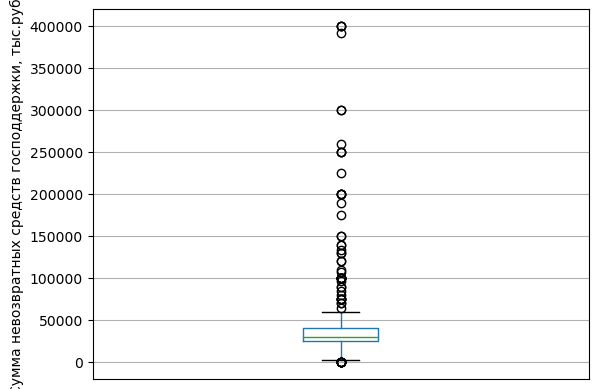

In [40]:
data.boxplot(column='nonrefundable_support')
plt.ylabel('Сумма невозвратных средств господдержки, тыс.руб.')
plt.xticks([])
plt.show();

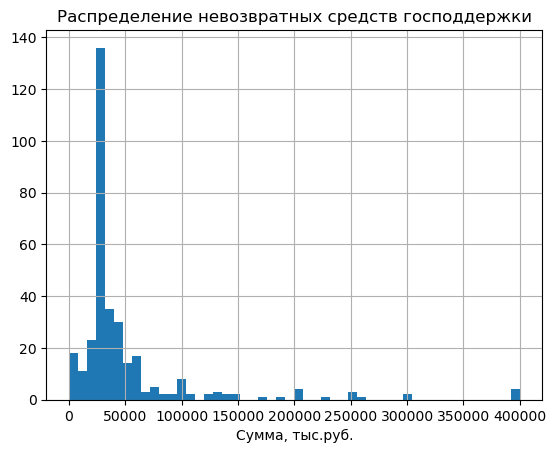

In [41]:
data['nonrefundable_support'].hist(bins=50)
plt.title('Распределение невозвратных средств господдержки')
plt.xlabel('Сумма, тыс.руб.')
plt.show();

In [42]:
data['nonrefundable_support'].describe()

count      332.00
mean     48980.99
std      59980.12
min          0.00
25%      25000.00
50%      30000.00
75%      40375.00
max     400000.00
Name: nonrefundable_support, dtype: float64

Как видно из распределения сумм невозвратных средств, медианное и среднее значения существенно различаются. Присутствуют аномально высокие значения, значительно превышающие нормальные, которые смещают среднюю величину в бОльшую сторону и увеличивают стандартное отклонение до аномально высокого уровня.

Поскольку данные сведения являются, вероятно, следствием индивидуального подхода со стороны источников господдержки, а значит, назначенные суммы не являются следствием ошибок, удаление данных выбросов привело бы к потере и других данных в указанных строках, необходимых для дальнейшего анализа. Поэтому мы не будем их редактировать, имея в дальнейшем в виду характер неоднородного распределения.

3. Проанализируем столбец `budget`.

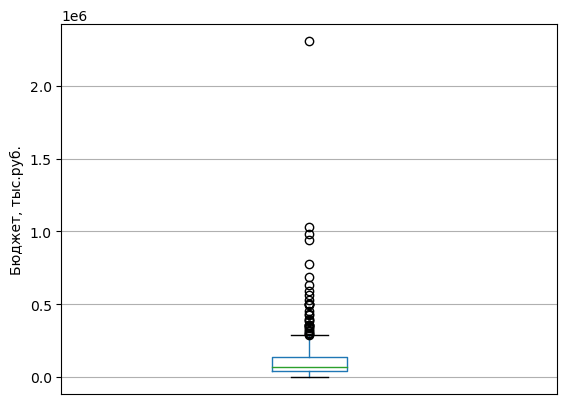

In [43]:
data.boxplot('budget')
plt.ylabel('Бюджет, тыс.руб.')
plt.xticks([])
plt.show();

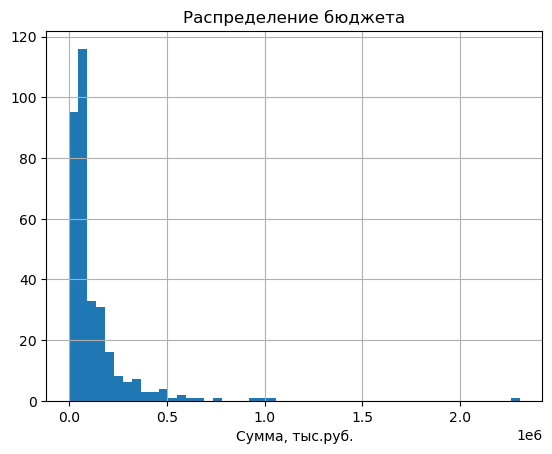

In [44]:
data['budget'].hist(bins=50)
plt.title('Распределение бюджета')
plt.xlabel('Сумма, тыс.руб.')
plt.show();

In [45]:
data['budget'].describe()

count       332.00
mean     127229.72
std      188588.33
min           0.00
25%       42000.00
50%       68649.92
75%      141985.32
max     2305074.30
Name: budget, dtype: float64

Как видно из распределения сумм бюджета, среднее значение почти в 2 раза превышает медаинное. Присутствуют аномально высокие значения, значительно превышающие нормальные, которые смещают среднюю величину в бОльшую сторону и увеличивают стандартное отклонение до аномально высокого уровня. Кроме того, присутствуют нулевые значения, которые свидетельствуют о нехватке финансовых данных по прочим фильмам.

Поскольку данные сведения являются, вероятно, следствием разнородного характера выборки фильмов с господдержкой, удаление данных выбросов привело бы к потере и других данных в указанных строках, необходимых для дальнейшего анализа.

Проверим, как соотносятся количественные данные о бюджете между собой.
Для этого сравним сумму столбцов `refundable_support` и `nonrefundable_support` с `budget`, выявим и исправим нарушения: сумма столбцов не должна превышать бюджет фильма.

In [46]:
# Проверим количество нарушений в данных по сумме бюджета.

data.loc[(data['refundable_support'] + data['nonrefundable_support']) > data['budget'], 'budget'].count()

17

Мы выявили 17 строк, в которых соотношение не выполняется. Для удобства работы с данными и предотвращения их утери заменим значения бюджета на сумму господдержки там, где это целесообразно.

In [47]:
# Заменим нарушенные данные о бюджете суммой по столбцам с господдержкой.

data.loc[(data['refundable_support'] + data['nonrefundable_support']) > data['budget'], 'budget'] = \
data['refundable_support'] + data['nonrefundable_support']

4. Проанализируем столбец `ratings`.

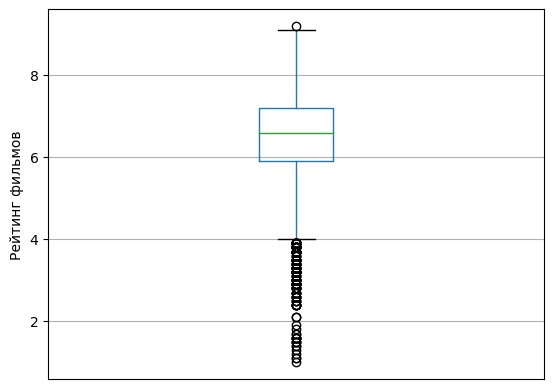

In [48]:
data.boxplot('ratings')
plt.ylabel('Рейтинг фильмов')
plt.xticks([])
plt.show();

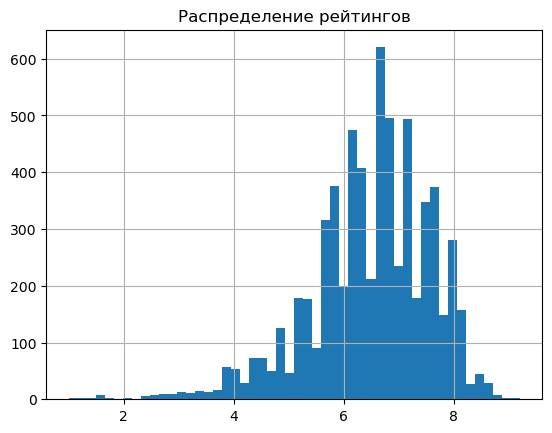

In [49]:
data['ratings'].hist(bins=50)
plt.title('Распределение рейтингов')
plt.xlabel('')
plt.show();

In [50]:
data['ratings'].describe()

count   6492.00
mean       6.48
std        1.10
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.20
Name: ratings, dtype: float64

После обработки ошибочных значений рейтингов на предыдущем этапе аномально высокие значения больше 10 были исключены. Кроме того, в столбце с рейтингами присутствуют аномально низкие значения, однако они существенно не влияют на среднее значение и статистику показателей данного столбца. Оставим их без изменений.

5. Проанализируем столбец `box_office`.

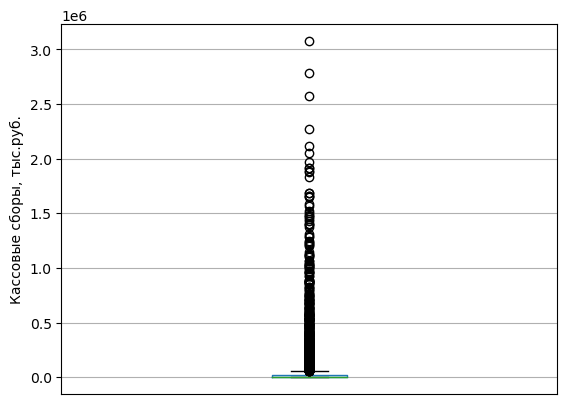

In [51]:
data.boxplot(column='box_office')
plt.ylabel('Кассовые сборы, тыс.руб.')
plt.xticks([])
plt.show();

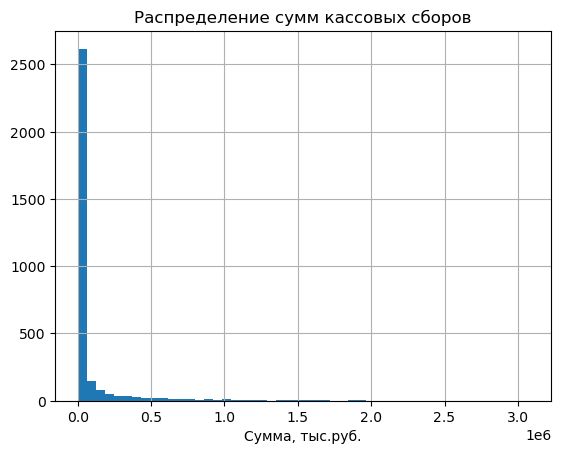

In [52]:
data['box_office'].hist(bins=50)
plt.title('Распределение сумм кассовых сборов')
plt.xlabel('Сумма, тыс.руб.')
plt.show();

In [53]:
data['box_office'].describe()

count      3158.00
mean      76478.70
std      240353.12
min           0.00
25%          86.24
50%        2327.99
75%       23979.67
max     3073568.69
Name: box_office, dtype: float64

Столбец с данными о кассовых сборах представляет собой в основном большой объем пустых данных с нулевыми или маловероятными низкими значениями. Оценить масштаб нехватки данных предстоит в процессе визуализации в динамике. Значения средней и медианы малоинформативны, поскольку данные не репрезентабельны для анализа.

### Создание новых столбцов

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [54]:
# Создаем новый столбец, выделив информацию о годе из столбца с премьерной датой.

data['year'] = data['show_start_date'].dt.year

Создадим новые столбцы: с именем режиссера и основным жанром фильма. Для этого создадим функцию, которая будет сохранять в новые столбцы данные, предшествующие первой запятой.

In [55]:
# Напишем фукнцию, которая отсекает текст до запятой.

def strip_comma(string):
    try:
        if ',' in string:
            for i in range(len(string)):
                if string[i] == ',':           
                    return string[:i]
        else:
            return string
    except:        
        pass

Применим функцию strip_comma к столбцу с перечислением режиссеров.

In [56]:
data['director_fin'] = data['director'].apply(strip_comma)

Избавимся от лишних пробелов в начале и конце значений столбца `director_fin`.

In [57]:
data['director_fin'] = data['director_fin'].str.strip()

Применим функцию strip_comma к столбцу с перечислением жанров.

In [58]:
data['genres_fin'] = data['genres'].apply(strip_comma)

Создадим новый столбец, содержащий информацию о доле господдержки в общем бюджете фильма в процентах.

In [59]:
data['gov_funds_percent'] = round(((data['refundable_support'] + data['nonrefundable_support']) / \
                                   data['budget'])*100, 2)

**Выводы**

Предобработка выявила следующие проблемы в данных:
- пропущенные значения,
- ложные типы данных,
- ошибочные значения в количественных данных,
- лишние пробелы, дублирование информации в категориальных данных.

Мы заменили не стали обрабатывать пропуски на данном этапе, поскольку их заполнение может привести к существенным искажениям, а также трудоемкому процессу заполнения. Целесообразность этого пока не ясна. Количественные столбцы мы оставили нетронутыми, поскольку для заполнения пропусков не хватает дополнительной информации или же их наличие обосновано.

Мы отсекли текстовую информацию в категориальных столбцах `genres`, `director`, чтобы в дальнейшем иметь возможность группировать данные по признакам.

Мы изменили типы данных, чтобы иметь техническую возможность обрабатывать информацию, содержащую даты или количественные значения.

Мы заменили ошибочные значения в количественном столбце `budget`.

Мы создали новые вспомогательные столбцы:
- `year` - информация о годе выхода в прокат,
- `director_fin` - имя режиссера,
- `genres_fin` - название жанра,
- `gov_funds_percent` - доля господдержки в общем бюджете фильма в %.

## Исследовательский анализ данных

1. Рассмотрим динамику выхода фильмов в прокат.

Выделим фильмы, информация о прокате в кинотеатрах которых известна.

In [60]:
# Создадим новый срез с данными о прокате.

data_fin = data.query('(budget > 0) | (box_office > 0)')

Рассмотрим общую информацию о данных ниже.

In [61]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3148 entries, 6 to 7480
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  3148 non-null   object        
 1   puNumber               3148 non-null   object        
 2   show_start_date        3148 non-null   datetime64[ns]
 3   type                   3148 non-null   object        
 4   film_studio            3147 non-null   object        
 5   production_country     3147 non-null   object        
 6   director               3147 non-null   object        
 7   producer               3035 non-null   object        
 8   age_restriction        3148 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  ratings 

Всего 3148 строк. Проанализируем количество пропусков в категориальных данных, которое может повлиять на ход исследования.
Как видно из таблицы ниже, в ключевых столбцах `ratings` и `genres` присутствуют пропуски, которые в сумме составляют больше 10% от общего количества строк.

In [62]:
data_fin.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 1
production_country          1
director                    1
producer                  113
age_restriction             0
refundable_support       2816
nonrefundable_support    2816
budget                   2816
financing_source         2816
ratings                   253
genres                    246
box_office                 14
year                        0
director_fin                1
genres_fin                246
gov_funds_percent        2816
dtype: int64

Проверим, являются ли пропуски в указанных столбцах симметричными. Убедимся, что 244 строки имеют пропуски в обоих столбцах. Таким образом, потеря данных в результате пропусков в датафрейме не превышает допустимый уровень.

In [63]:
data_fin.loc[(data_fin['ratings'].isna()==True)&(data_fin['genres_fin'].isna()==True), 'puNumber'].count()

244

Рассмотрим, какую долю составляли фильмы, о прокате которых информация была зафиксирована на протяжении нескольких лет.

In [64]:
# Сделаем сводную таблицу для подсчета.

new_data = data.pivot_table(index='year',
                            values=['title', 'box_office'],
                            aggfunc='count')
new_data.columns = ['Количество фильмов с данными о прокате', 'Всего фильмов']

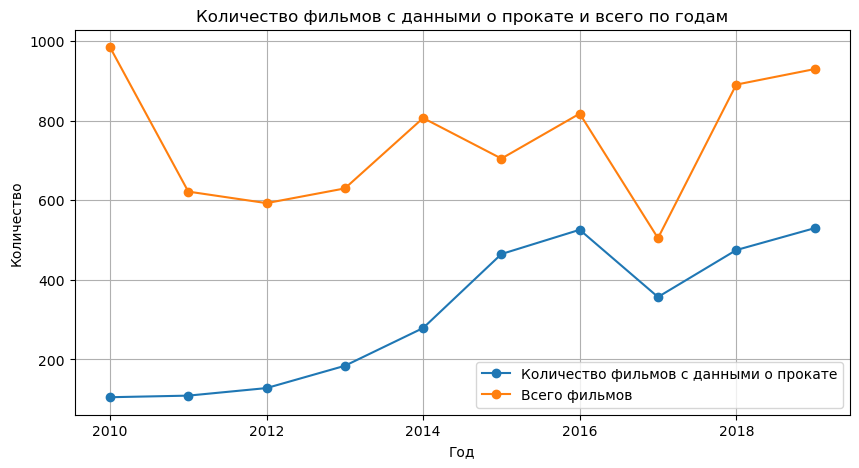

In [65]:
# Построим график с количеством данных в динамике.

new_data.plot(grid=True, style='o-', figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Количество фильмов с данными о прокате и всего по годам')
plt.show();

In [66]:
# Добавим столбец с долей фильмов с информацией о прокате в общем количестве.

new_data['Доля фильмов в прокате, %'] = round((new_data['Количество фильмов с данными о прокате'] /
                                               new_data['Всего фильмов'])*100, 2)
new_data

,Количество фильмов с данными о прокате,Всего фильмов,"Доля фильмов в прокате, %"
year,,,
2010,105,985,10.66
2011,109,622,17.52
2012,128,593,21.59
2013,184,630,29.21
2014,279,807,34.57
2015,465,705,65.96
2016,526,818,64.30
2017,357,505,70.69
2018,475,891,53.31


- Из приведенных выше данных видно, что больше всего данных о фильмах содержится за 2010 год, и в то же время за указанный период меньше всего сведений о фильмах в прокате. Начиная с 2015 года доля сведений о фильмах в прокате превысила половину от общего количества.
- Наиболее полные сведения (71% от общего количества) представлены за 2017 год.
- Можно предположить, что данные и о сборах, и о бюджетах были собраны из разных источников. В сумме они являются неполными.

2. Изучим, как менялась динамика проката по годам. Рассмотрим динамику суммы кассовых сборов.

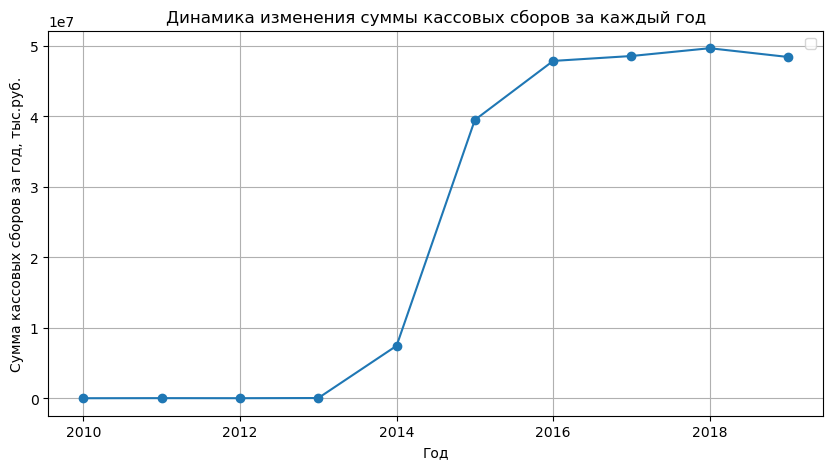

In [67]:
# Построим график суммы прокатных сборов в динамике.

data_fin.pivot_table(index='year',
                     values='box_office',
                     aggfunc='sum').\
plot(figsize=(10,5), grid=True, style='o-')
plt.title('Динамика изменения суммы кассовых сборов за каждый год')
plt.legend('')
plt.xlabel('Год')
plt.ylabel('Сумма кассовых сборов за год, тыс.руб.')
plt.show();

Начиная с 2015 года (наиболее репрезентативный период для анализа количественных данных), ежегодный объем кассовых сборов возрастал и достиг пика около 50 млр.рублей в 2018 году. После чего ненамного снизился к 2019 году. Минимальная сумма кассовых сборов наблюдалась в 2015 году на уровне около 40 млрд.рублей. Можно сделать вывод, что мы владеем не полными данными о кассовых сборах за период с 2010 по 2014 гг.

3. Рассчитаем среднюю и медианную величину ежегодной суммы кассовых сборов и приведем их в сводной таблице.

In [68]:
# Создадим сводную таблицу по кассовым сборам за каждый год на основе данных о прокате фильмов. Переименуем столбцы,
# выразим значения в тысячах рублей.

data_fin_rev = data_fin.pivot_table(index='year',
                                    values='box_office',
                                    aggfunc=['mean', 'median'])
data_fin_rev.columns = ['Среднее значение сборов, тыс.руб.', 'Медианное значение сборов, тыс.руб.']
data_fin_rev['Среднее значение сборов, тыс.руб.'] = round(data_fin_rev['Среднее значение сборов, тыс.руб.'],2)
data_fin_rev['Медианное значение сборов, тыс.руб.'] = round(data_fin_rev['Медианное значение сборов, тыс.руб.'],2)
data_fin_rev

,"Среднее значение сборов, тыс.руб.","Медианное значение сборов, тыс.руб."
year,,
2010,24.05,1.71
2011,129.38,3.00
2012,56.55,6.22
2013,166.48,3.58
2014,27270.89,20.40
2015,85492.13,5003.45
2016,91173.90,3915.04
2017,136032.79,9968.34
2018,104565.06,8891.10


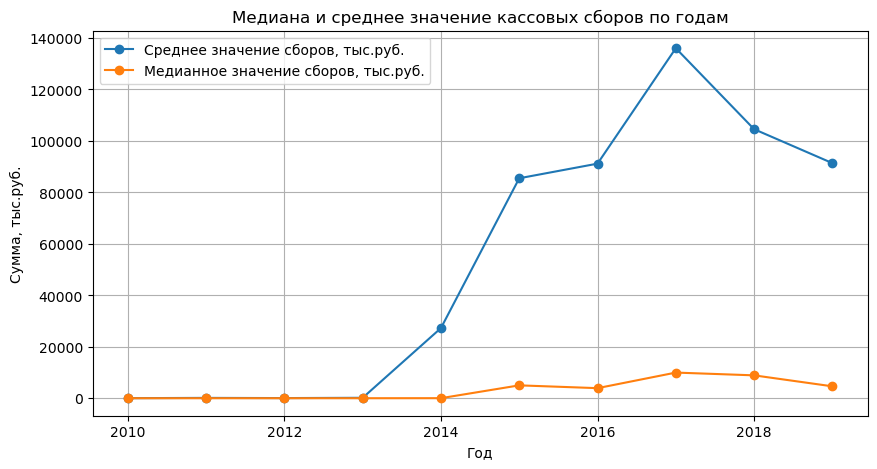

In [69]:
# Построим график со средними и медианными значениями по годам.

data_fin_rev.plot(grid=True, style='o-', figsize=(10,5))
plt.xlabel('Год')
plt.title('Медиана и среднее значение кассовых сборов по годам')
plt.ylabel('Сумма, тыс.руб.')
plt.show();

По итогам анализа сводной таблицы можно сделать вывод о том, что до 2015 года приведены неправдоподобные сведения о суммах сборов, которые, должно быть, возникли в результате компоновки данных из разных источников и, возможно, ошибочных единиц измерения, а также в результате нехватки данных. Выявлять и исправлять подобные ошибки самостоятельно не представляется возможным.

Данные о сборах распределены крайне неравномерно. Ни в одном периоде среднее значение не приближено к медиане, но смещено в бОльшую сторону по причине влияния выбросов с аномально высокими значениями.

4. Рассмотрим, как влияет возрастное ограничение аудитории на сборы фильмов в прокате с 2015 по 2019 год.
Построим диаграмму, которая отражает сумму кассовых сборов в разрезе возрастных ограничений.

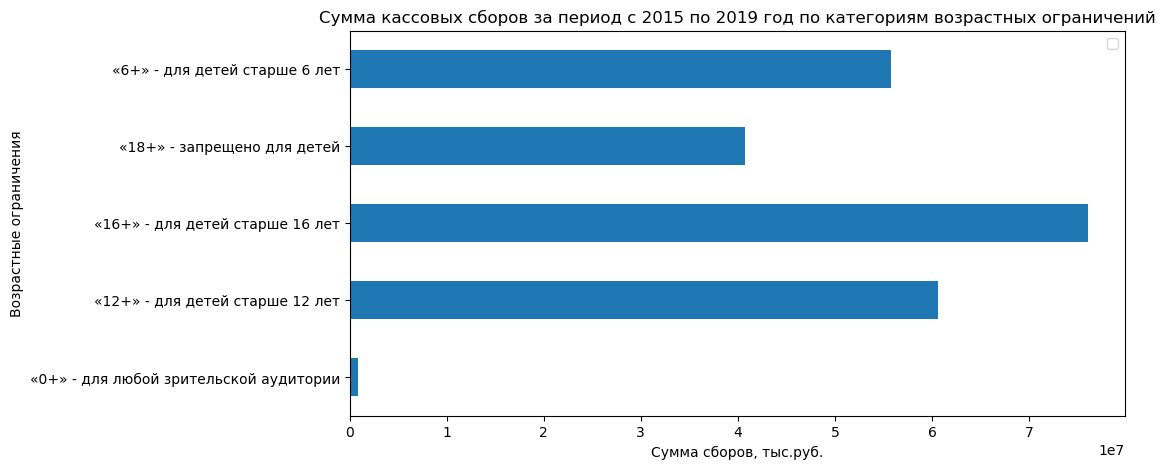

In [70]:
# Выделим срез данных о прокате за период с 2015 по 2019 год и построим столбчатую диаграмму.

data_fin_year = data_fin.query('year > 2014')
data_fin_year.pivot_table(index='age_restriction',
                          values='box_office',
                          aggfunc='sum').\
plot(kind='barh', figsize=(10,5))
plt.title('Сумма кассовых сборов за период с 2015 по 2019 год по категориям возрастных ограничений')
plt.ylabel('Возрастные ограничения')
plt.xlabel('Сумма сборов, тыс.руб.')
plt.legend('')
plt.show();

Наибольшая сумма кассовых сборов наблюдалась в категории 16+, наименьшая - в категории 0+. Отчасти данный результат связан с тем, что в категорию 16+ входит наибольшее количество зрителей: данная категория погранична для возрастов подростков и взрослых, что делает фильмы интересными и для тех, и для других. В категорию же 0+ входит семейное кино и мультфильмы, зрителями которых являются менее многочисленная аудитория.

Рассмотрим, наблюдается ли данная тенденция в разрезе лет.

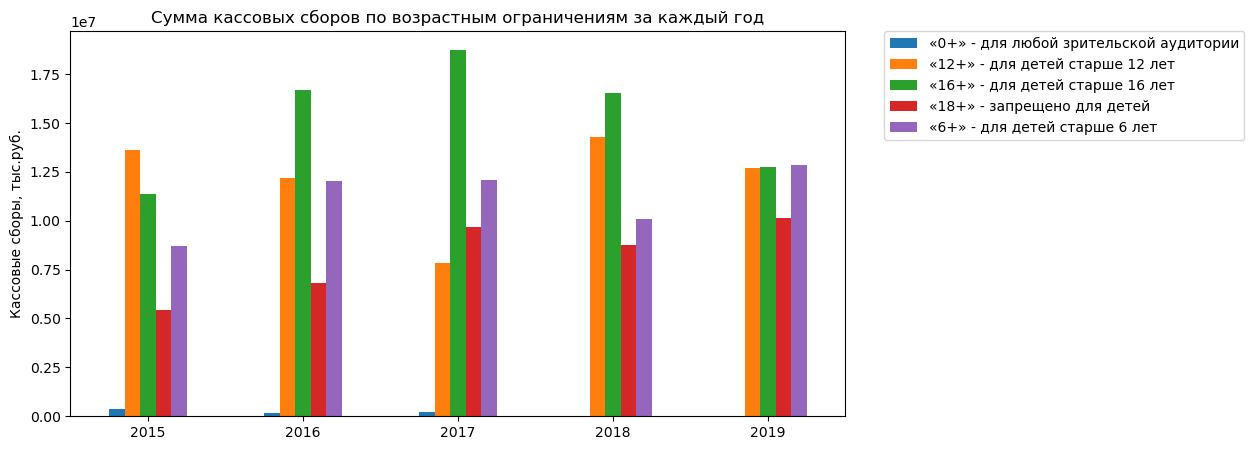

In [71]:
# Построим столбчатую диаграмму кассовых сборов в разрезе возрастных категорий по годам.

data_fin_year.pivot_table(index='year',
                          columns = 'age_restriction',
                          values='box_office',
                          aggfunc='sum').\
plot(kind='bar', figsize=(10,5))
plt.title('Сумма кассовых сборов по возрастным ограничениям за каждый год')
plt.xlabel('')
plt.ylabel('Кассовые сборы, тыс.руб.')
plt.xticks(rotation = 'horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show();

Проанализировав сведения по годам, мы увидели, что сумма кассовых сборов меняется.
Проверим, изменялось ли количество фильмов в прокате в самых доходных категориях: 12+ и 16+.

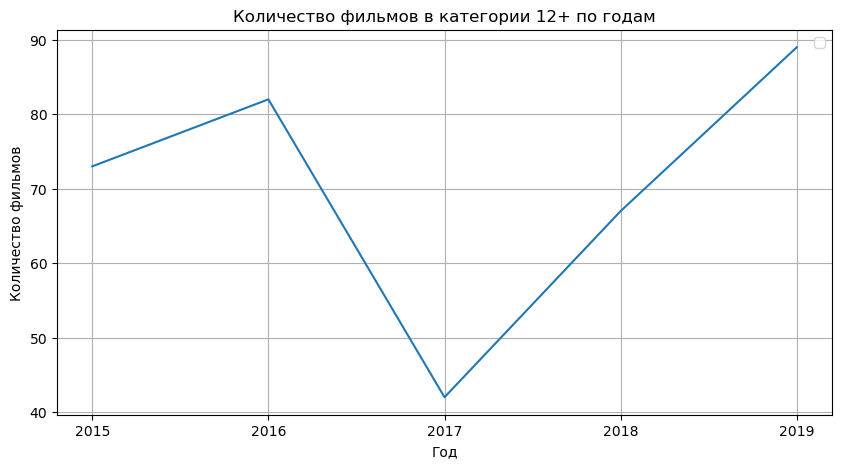

In [72]:
# Построим график изменения ежегодного количества фильмов в категории 12+.

data_fin_year.loc[data_fin_year['age_restriction'] == '«12+» - для детей старше 12 лет'].\
                                pivot_table(index='year',
                                            values='age_restriction',
                                            aggfunc='count').\
plot(figsize=(10,5), grid=True)
plt.title('Количество фильмов в категории 12+ по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend('')
plt.xticks(range(2015, 2020, 1))
plt.show();

Мы видим, что количество фильмов изменялось безотносительно изменений кассовых сборов. Причинами могут быть появление в прокате фильмов, ставших популярными и принесших наибольшие сборы.
Рассмотрим данную гипотезу на примере категории 16+.

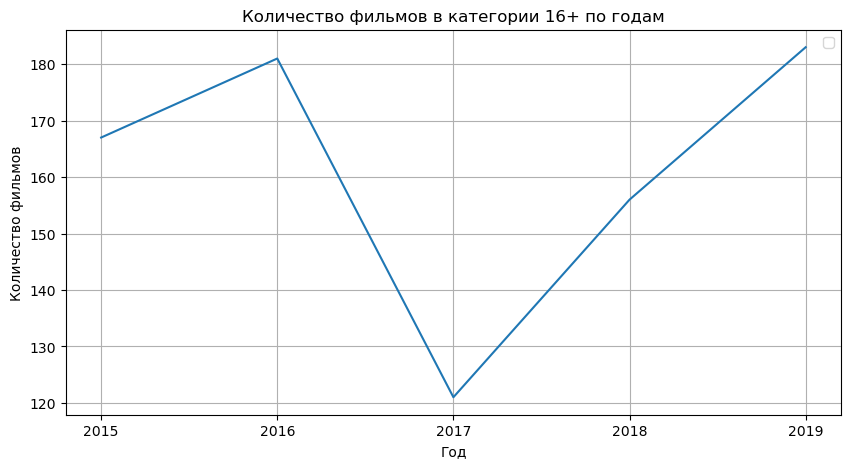

In [73]:
# Построим график изменения ежегодного количества фильмов в категории 16+.

data_fin_year.loc[data_fin_year['age_restriction'] == '«16+» - для детей старше 16 лет'].\
                                pivot_table(index='year',
                                            values='age_restriction',
                                            aggfunc='count').\
plot(figsize=(10,5), grid=True)
plt.title('Количество фильмов в категории 16+ по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend('')
plt.xticks(range(2015, 2020, 1))
plt.show();

Как видно из графика, количество фильмов в 2017 году упало на треть. В то же время кассовые сборы в данной категории, напротив, выросли.
Проверим, какую сумму кассовых сборов принесла первая по доходности десятка фильмов в 2017 году и, для сравнения, в 2016м году.

In [74]:
# Рассчитаем сумму кассовых сборов для первых самых доходных 10 фильмов в 2016 году.

round(data_fin_year.loc[(data_fin_year['age_restriction'] == '«16+» - для детей старше 16 лет') &
                        (data_fin_year['year'] == 2016), 'box_office'].
      sort_values(ascending=False).head(10).sum(),0)

8785694.0

In [75]:
# Рассчитаем сумму кассовых сборов для первых самых доходных 10 фильмов в 2017 году.

round(data_fin_year.loc[(data_fin_year['age_restriction'] == '«16+» - для детей старше 16 лет') &
                        (data_fin_year['year'] == 2017), 'box_office'].
      sort_values(ascending=False).head(10).sum(),0)

10979375.0

Разница составила около 2 млрд.рублей. Соответственно, влияние звездных фильмов на общие сборы недооценивать нельзя.

Кроме того, построим столбчатую диаграмму для медианных значений кассовых сборов в разрезе возрастных категорий.

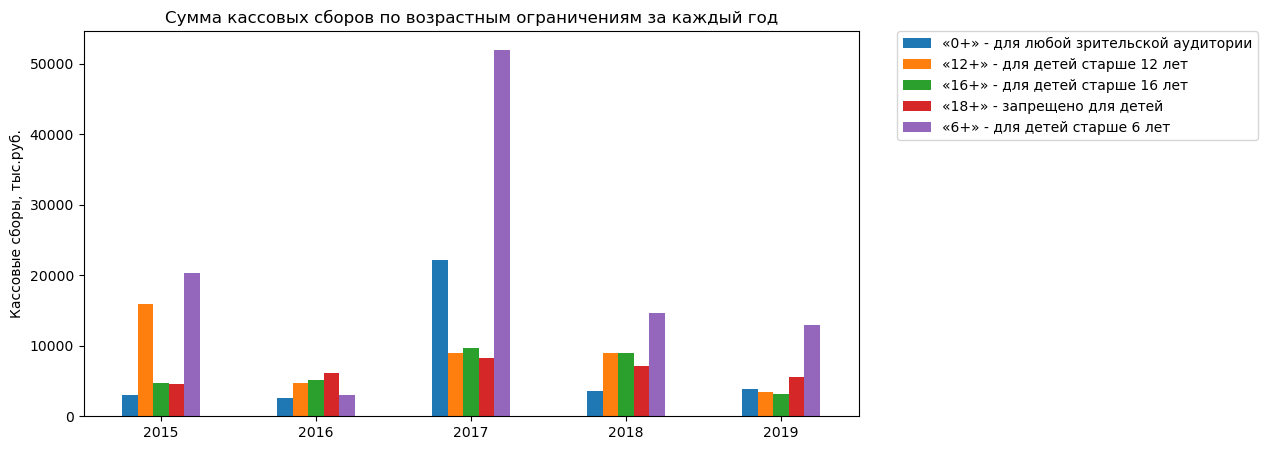

In [76]:
# Построим столбчатую диаграмму медиан кассовых сборов в разрезе возрастных категорий по годам.

data_fin_year.pivot_table(index='year',
                          columns = 'age_restriction',
                          values='box_office',
                          aggfunc='median').\
plot(kind='bar', figsize=(10,5))
plt.title('Сумма кассовых сборов по возрастным ограничениям за каждый год')
plt.xlabel('')
plt.ylabel('Кассовые сборы, тыс.руб.')
plt.xticks(rotation = 'horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show();

Как видно из диаграммы, медиана кассовых сборов по годам существенно отличается от общей картины суммарно по категориям. В 2017 году медианная сумма сборов в категории 6+ существенно выросла, по сравнению с другими. Категория 0+ также принесла больше кассовых сборов по медиане. Данный факт может говорить о росте спроса со стороны семей на просмотры фильмов в данных категориях. Больше кассовых сборов в них могли принести громкие премьеры.

**Выводы**

- Мы исследовали имеющиеся данные о фильмах в прокате и пришли к выводу, что временной отрезок, подходящий для репрезентативного исследования равен периоду с 2015 по 2019 год.
- Наибольший объем кассовых сборов наблюдался в 2018 году (около 50 млрд.рублей).
- Информация о кассовых сборах неравномерная, в ней присутствуют искажения и выбросы, что негативно влияет на медианные и средние значения.
- Мы установили, что наибольшие кассовые сборы приходятся на категорию возрастного ограничения 16+ как самую многочисленную зрительскую аудиторию. В то же время, в разрезе лет картина меняется в зависимости от количества выходящих в прокат фильмов, а также от того, насколько успешны сами картины.
- Анализируя медианные значения кассовых сборов по годам, мы увидели аномальный рост в категориях 0+ и 6+ в 2017 году, что может свидетельствовать о росте спроса по причине ярких премьер.

## Исследовательский анализ фильмов, которые получили государственную поддержку

1. Выделим из данных фильмы в прокате, получившие государственную поддержку, в отдельную переменную `data_gov_fin` и проанализируем общую информацию.

In [77]:
data_gov_fin = data.query('(refundable_support + nonrefundable_support) > 0').reset_index()
data_gov_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  332 non-null    int64         
 1   title                  332 non-null    object        
 2   puNumber               332 non-null    object        
 3   show_start_date        332 non-null    datetime64[ns]
 4   type                   332 non-null    object        
 5   film_studio            332 non-null    object        
 6   production_country     332 non-null    object        
 7   director               332 non-null    object        
 8   producer               330 non-null    object        
 9   age_restriction        332 non-null    object        
 10  refundable_support     332 non-null    float64       
 11  nonrefundable_support  332 non-null    float64       
 12  budget                 332 non-null    float64       
 13  finan

Количество пропусков в данных категории господдержки не превышает допустимый уровень (не более 10.5% от среза данных с 332 строками), поэтому не будем их редактировать.

Рассмотрим структуру госфинансирования кинопроката в разрезе жанров, создав новый столбец, отражающий сумму возвратных и невозвратных бюджетных средств.

In [78]:
data_gov_fin['gov_support'] = data_gov_fin['refundable_support'] + data_gov_fin['nonrefundable_support']

2. Визуализируем, как изменялся объем господдержки во времени. Обратим внимание, что финансовые данные о фильмах в прокате репрезентабельны начиная с 2015 года. Из графика ниже следует, что начиная с 2015 года объем средств возрастал, снизившись в 2017 году, снова возобновив рост, достигнув максимума в 2019 году.

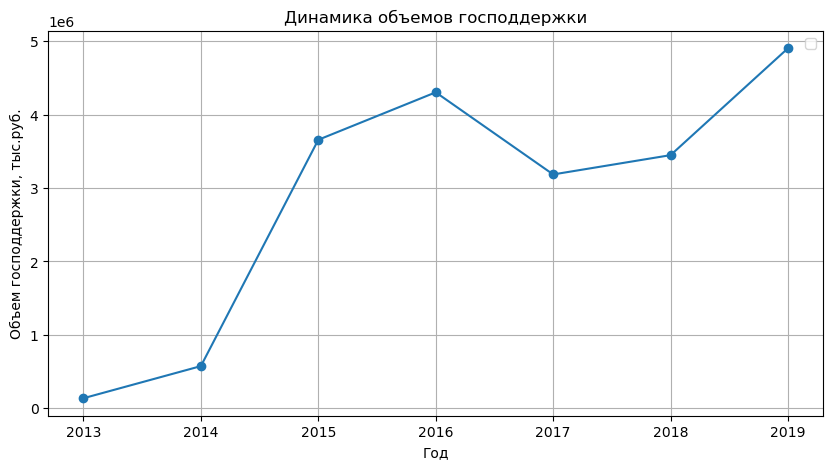

In [79]:
data_gov_fin.pivot_table(index='year',
                         values='gov_support',
                         aggfunc='sum').\
plot(grid=True, figsize=(10,5), style=('o-'))
plt.title('Динамика объемов господдержки')
plt.xlabel('Год')
plt.ylabel('Объем господдержки, тыс.руб.')
plt.legend('')
plt.show();

3. Проанализируем, на какие жанры расходовалось больше всего государственных средств. Для этого создадим сводную таблицу.

In [80]:
data_gov_genres_table = data_gov_fin.pivot_table(index='genres_fin',
                                                 values='gov_support',
                                                 aggfunc=['sum', 'count']).reset_index()
data_gov_genres_table.columns = ['Жанры', 'Господдержка, тыс.руб.', 'Количество фильмов']
data_gov_genres_table['Господдержка, тыс.руб.'] = round(data_gov_genres_table['Господдержка, тыс.руб.'], 2)

Отсортируем жанры по объему господдержки и выделим наиболее расходные направления.

In [81]:
data_gov_genres_table = data_gov_genres_table.sort_values(by='Господдержка, тыс.руб.', ascending=False).\
                                                                                    reset_index(drop=True)
data_gov_genres_table.head(10)

,Жанры,"Господдержка, тыс.руб.",Количество фильмов
0,драма,5314406.63,93
1,комедия,3218282.94,74
2,мультфильм,2461520.00,31
3,фантастика,1406000.00,11
4,фэнтези,1032900.00,11
5,история,1020000.00,4
6,триллер,769645.28,15
7,приключения,696000.00,7
8,детектив,485000.00,5
9,спорт,455000.00,3


Для наглядности приведем столбчатую диаграмму с объемами госфинансов в разрезе жанров кино. Как видно из таблицы и графика, жанр драма занимает как наибольшую долю в общем объеме государственной помощи, так и наибольшее количество фильмов. На втором месте комедия, на третьем - мультфильмы.

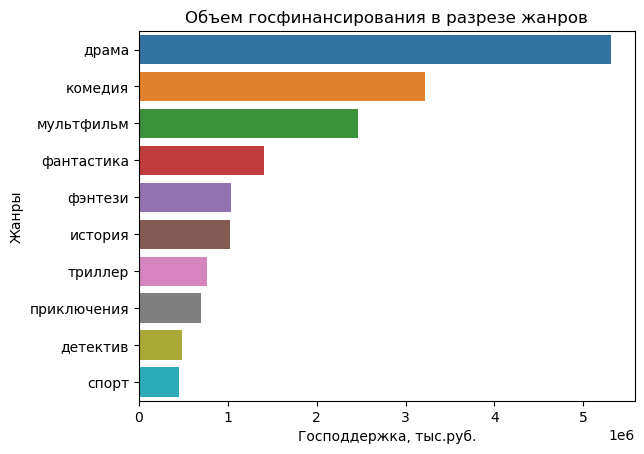

In [82]:
seaborn.barplot(x=data_gov_genres_table.loc[:9, 'Господдержка, тыс.руб.'],
                y=data_gov_genres_table.loc[:9, 'Жанры'])
plt.title('Объем госфинансирования в разрезе жанров')
plt.show();

4. По аналогии с жанрами, рассмотрим, на фильмы каких режиссеров расходовалось больше всего бюджетных средств. Для этой цели проанализируем столбец с именами режиссеров на предмет неявных дубликатов.

In [83]:
data_gov_fin['director_fin'].sort_values().unique()

array(['А Андрющенко', 'А.Аббасов', 'А.Аксененко', 'А.Амиров',
       'А.Ананикян', 'А.Андрианов', 'А.Аравин', 'А.Атанесян', 'А.Баршак',
       'А.Богатырев', 'А.Богуславский', 'А.Велединский', 'А.Войтинский',
       'А.Волгин', 'А.Галибин', 'А.Герман', 'А.Горчилин', 'А.Домогаров',
       'А.Зайцев', 'А.Звягинцев', 'А.Золотухин', 'А.Игудин', 'А.Калинкин',
       'А.Карпиловский', 'А.Касаткин', 'А.Китайцев', 'А.Коваленко',
       'А.Колпин', 'А.Кончаловский', 'А.Котт', 'А.Кравчук',
       'А.Красовский', 'А.Луканев', 'А.Лукичев', 'А.Лукьянчиков',
       'А.Лунгин', 'А.Майовер', 'А.Матисон', 'А.Мегердичев', 'А.Меликян',
       'А.Мельник', 'А.Мизгирев', 'А.Миндадзе', 'А.Михалков',
       'А.Михалков (псевдоним А.Кончаловский)', 'А.Молочников',
       'А.Нужный', 'А.Пармас', 'А.Першин (псевдоним Ж.Крыжовников)',
       'А.Пиманов', 'А.Пинхасов', 'А.Попова', 'А.Прошкин', 'А.Романец',
       'А.Сахелашвили', 'А.Сидоров', 'А.Соколов', 'А.Стриженов',
       'А.Сурикова', 'А.Сухарев', 'А.Темни

Выявленные неявные дубликаты заменим.

In [84]:
duplicates = ['М.Бальчюнас (псевдоним М.Вайсберг)', 'М.Бальчюнас (псевдоним Марюс Вайсберг)', 'М.Бальчюнас']
name = 'М.Вайсберг'
data_gov_fin['director_fin'] = data_gov_fin['director_fin'].replace(duplicates, name)

In [85]:
data_gov_fin['director_fin'] = data_gov_fin['director_fin'].replace({'А.Михалков (псевдоним А.Кончаловский)':
                                                                     'А.Кончаловский',
                                                                     'А.Черномазов (псевдоним Алексей Нужный)':
                                                                     'А.Нужный'})

Создадим сводную таблицу с господдержкой в разрезе авторства режиссеров.

In [86]:
data_gov_director_table = data_gov_fin.pivot_table(index='director_fin',
                                                   values='gov_support',
                                                   aggfunc=['sum', 'count']).reset_index()
data_gov_director_table.columns = ['Директор', 'Господдержка, тыс.руб.', 'Количество фильмов']
data_gov_director_table['Господдержка, тыс.руб.'] = round(data_gov_director_table['Господдержка, тыс.руб.'], 2)

Отсортируем режиссеров по объему господдержки и выделим 10 основных направлений.

In [87]:
data_gov_director_table = data_gov_director_table.sort_values(by='Господдержка, тыс.руб.', ascending=False).\
                                                                                        reset_index(drop=True)
data_gov_director_table.head(10)

,Директор,"Господдержка, тыс.руб.",Количество фильмов
0,Ф.Бондарчук,750000.00,2
1,Н.Хомерики,660000.00,3
2,А.Кравчук,500000.00,1
3,Р.Давлетьяров,459847.94,5
4,А.Мизгирев,450000.00,1
5,Н.Лебедев,442104.48,1
6,А.Мегердичев,400000.00,1
7,Д.Дьяченко,351000.00,4
8,И.Шурховецкий,350000.00,1
9,А.Цицилин,350000.00,3


Для наглядности приведем столбчатую диаграмму с объемами госфинансов в разрезе авторства режиссеров. Как видно из таблицы и графика, больше всего госсредств было направлено на фильмы Ф.Бондарчука, затем Н.Хомерики и А.Кравчука. В то же время, количество фильмов у режиссеров различается.

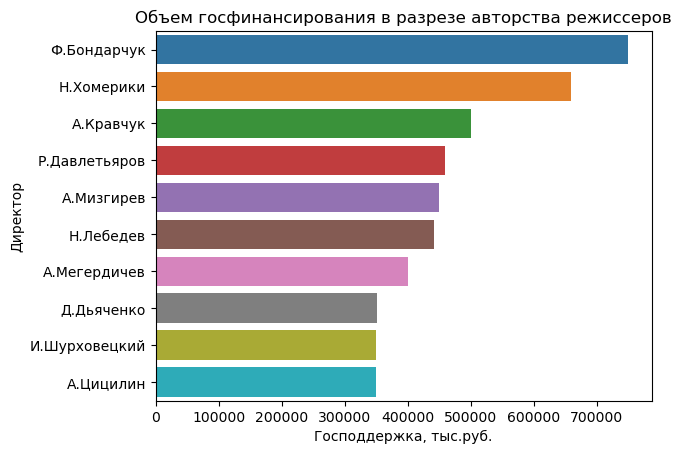

In [88]:
seaborn.barplot(x=data_gov_director_table.loc[:9, 'Господдержка, тыс.руб.'],
                y=data_gov_director_table.loc[:9,'Директор'])
plt.title('Объем госфинансирования в разрезе авторства режиссеров')
plt.show()

Чтобы ответить на вопрос о том, нравятся ли фильмы зрителю, рассмотрим такие параметры, как рейтинги и окупаемость. 

5. Рассчитаем окупаемость фильмов с госучастием.

In [89]:
data_gov_fin['gov_payback'] = round(data_gov_fin['box_office']/data_gov_fin['budget']*100,1)

Проанализируем распределение средств господдержки, рейтингов и окупаемости фильмов с госучастием.

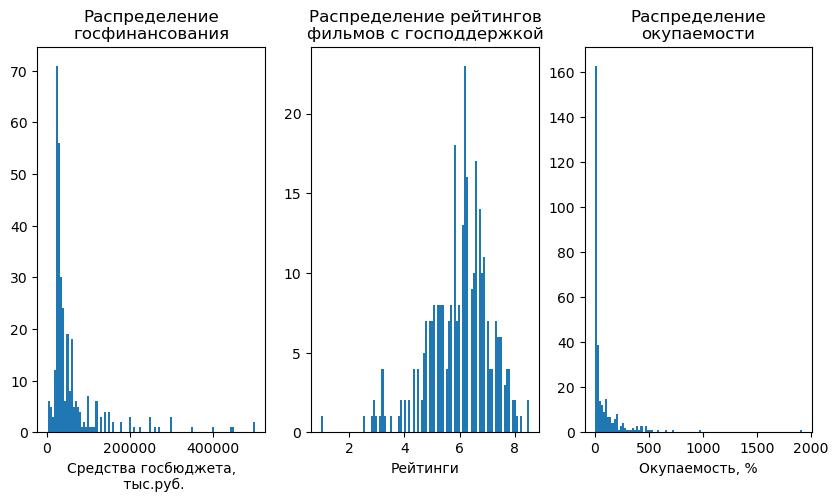

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

ax1.hist(data_gov_fin['gov_support'], bins=100)
ax1.set_title('Распределение\nгосфинансования')
ax1.set_xlabel('Средства госбюджета,\n тыс.руб.')

ax2.hist(data_gov_fin['ratings'], bins=100)
ax2.set_title('Распределение рейтингов\nфильмов с господдержкой')
ax2.set_xlabel('Рейтинги')

ax3.hist(data_gov_fin['gov_payback'], bins=100)
ax3.set_title('Распределение\nокупаемости')
ax3.set_xlabel('Окупаемость, %')

plt.show()

In [91]:
data_gov_fin[['gov_support', 'ratings', 'gov_payback']].describe()

,gov_support,ratings,gov_payback
count,332.00,316.00,318.00
mean,60845.45,6.00,82.58
std,72755.46,1.12,168.76
min,3000.00,1.00,0.00
25%,25333.75,5.30,2.32
50%,35000.00,6.20,17.65
75%,60000.00,6.70,96.92
max,500000.00,8.50,1921.00


- Распределение госфинансирования имеет длинный "хвост" справа, который искажает средние показатели в бОльшую сторону и говорит о том, что на творчество некоторых режиссеров выделяются крупные суммы, в то время как медианное значение составляет 35 млн.рублей.
- Как видно, распределение рейтингов кинофильмов является нормальным, со средним значением около 6.0. При этом единичные выбросы смещают среднюю величину влево.
- Данные по окупаемости фильмов с господдержкой распределены крайне неравномерно. В них присутствуют и выбросы, смещающие среднюю величину в бОльшую сторону, и в то же время половина фильмов демонстрировала крайне низкую окупаемость на уровне 17.65% и ниже. Основая доля картин не достигла окупаемости.

Таким образом, имея в наличии скромный набор данных в районе 300 строк довольно сложно сделать статистически значимые выводы о предпочтениях зрителей, особенно в условиях выбросов и неравномерного распределения. Если показатели окупаемости харакретизуют не только и не столько успешность фильмов у зрителей, сколько эффективность расходования средств менеджментом, то показатели рейтингов - полностью отражают настроения зрителя, и нормальное распределение данных о рейтингах позволяет сделать анализ.

6. Рассмотрим, как изменялся медианный рейтинг кинофильмов с госучастием в сравнении с фильмами на частном финансировании.

В данных о фильмах, вышедших в прокат, выделим две категории: с государственной поддержкой и без нее.

In [92]:
def gov_nongov_cat(budget):
    try:
        if budget > 0:
            return 'С госучастием'            
        else:
            return 'Без госучастия'
    except:
        pass

In [93]:
data_fin['gov_nongov_cat'] = data_fin['budget'].apply(gov_nongov_cat)

Построим график, отражающий динамику изменения рейтингов фильмов с 2010 года. Обратим внимание, что данные о фильмах в прокате репрезентабельны начиная с 2015 года.

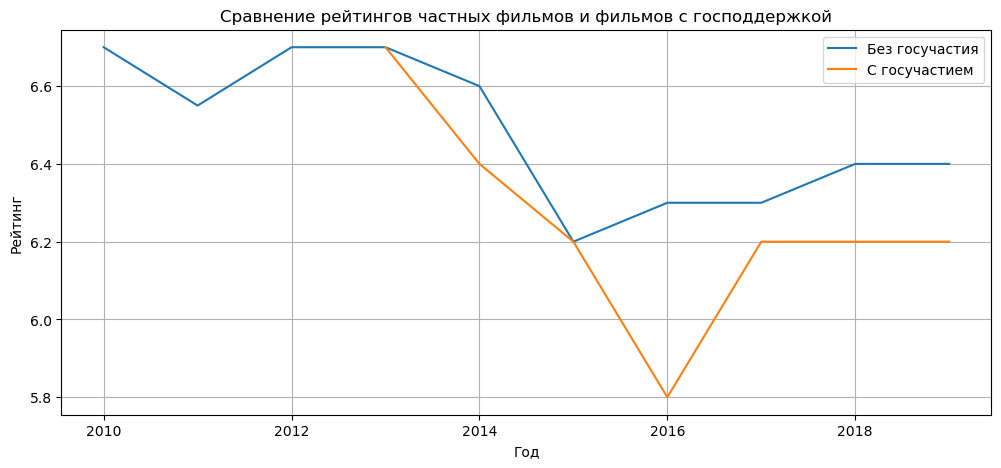

In [94]:
data_fin.pivot_table(index='year',
                     columns='gov_nongov_cat',
                     values='ratings',
                     aggfunc='median').\
plot(figsize=(12,5), grid=True)
plt.title('Сравнение рейтингов частных фильмов и фильмов с господдержкой')
plt.xlabel('Год')
plt.ylabel('Рейтинг')
plt.legend(['Без госучастия', 'С госучастием'])
plt.show();

Как видно из графика, медианный рейтинг частных фильмов превышает рейтинг фильмов с госучастием в каждом периоде. Отметим, что в 2016 году отмечается существенное снижение рейтинга в категории с госфинансированием.

Проанализируем рыночные предпочтения кинолюбителей в разрезе жанров.
Для этого создадим две сводные таблицы, отражающие медианные рейтинги в разных жанрах на рынке проката и в категории фильмов с госфинансированием.

In [95]:
# Создадим таблицу с количеством фильмов и медианами рейтингов в разрезе жанров на основе данных о прокате.

data_genres_table = data_fin.pivot_table(index='genres_fin',
                                         values='ratings',
                                         aggfunc=['median', 'count']).reset_index()
data_genres_table.columns = ['Жанр', 'Рейтинги фильмов в прокате', 'Количество фильмов в прокате']
data_genres_table = data_genres_table.sort_values(by='Рейтинги фильмов в прокате', ascending=False)

In [96]:
# Создадим таблицу с количеством фильмов и медианами рейтингов в разрезе жанров на основе данных о господдержке.

data_gov_gen_rat_table = data_gov_fin.pivot_table(index='genres_fin',
                                                  values='ratings',
                                                  aggfunc=['median', 'count']).reset_index()
data_gov_gen_rat_table.columns = ['Жанр', 'Рейтинги фильмов с гоподдержкой', 'Количество фильмов с господдержкой']

Объединим две таблицы по признаку жанров, рассмотрим их в порядке убывания рейтинга на рынке кинопроката.

In [97]:
data_gen_ratings_comp = data_genres_table.merge(data_gov_gen_rat_table,
                                                on='Жанр',
                                                how='outer')
data_gen_ratings_comp.style.background_gradient(axis=0)

,Жанр,Рейтинги фильмов в прокате,Количество фильмов в прокате,Рейтинги фильмов с гоподдержкой,Количество фильмов с господдержкой
0,концерт,8.600000,2,nan,nan
1,вестерн,7.900000,5,nan,nan
2,короткометражка,7.800000,1,nan,nan
3,фильм-нуар,7.600000,1,nan,nan
4,аниме,7.400000,31,nan,nan
5,документальный,7.400000,99,nan,nan
6,спорт,7.250000,6,7.000000,3.000000
7,детский,7.200000,20,7.250000,4.000000
8,музыка,7.000000,3,nan,nan
9,биография,6.900000,20,6.900000,3.000000


Как видно из таблицы выше, в целом адресность бюджетных средств отвечает запросам рынка. Госфинансирование касалось основных представленных на прокатном рынке жанров кино. Однако среди фильмов проката с высоким рейтингом документальный жанр остался без внимания со стороны государства.

In [98]:
data_gen_ratings_comp.loc[data_gen_ratings_comp['Жанр'].isin(['драма', 'комедия', 'мультфильм'])]

,Жанр,Рейтинги фильмов в прокате,Количество фильмов в прокате,Рейтинги фильмов с гоподдержкой,Количество фильмов с господдержкой
12,драма,6.70,689,6.40,93.00
22,мультфильм,6.20,340,6.20,31.00
23,комедия,5.90,370,5.75,74.00


Фильмы основных финансируемых государством жанров (драма, мультфимы и комедия) - в целом оцениваются зрителем на уровне прокатного рынка или чуть ниже. В то же время, эти жанры довольно популярны в прокате, и в этом смысле бюджетные средства пошли на самые массовые по количеству фильмов жанры.

7. Проанализируем объемы финансирования государством в разрезе источников и вида поддержки.

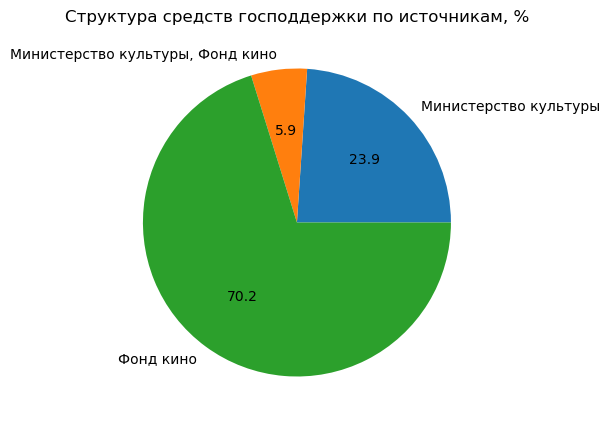

In [99]:
data_gov_fin.pivot_table(index='financing_source',
                         values='gov_support',
                         aggfunc='sum').\
plot(kind='pie',
     x='financing_source',
     y='gov_support',
     figsize=(10,5),
     autopct='%.1f',
     legend=None)
plt.ylabel('')
plt.title('Структура средств господдержки по источникам, %')
plt.show();

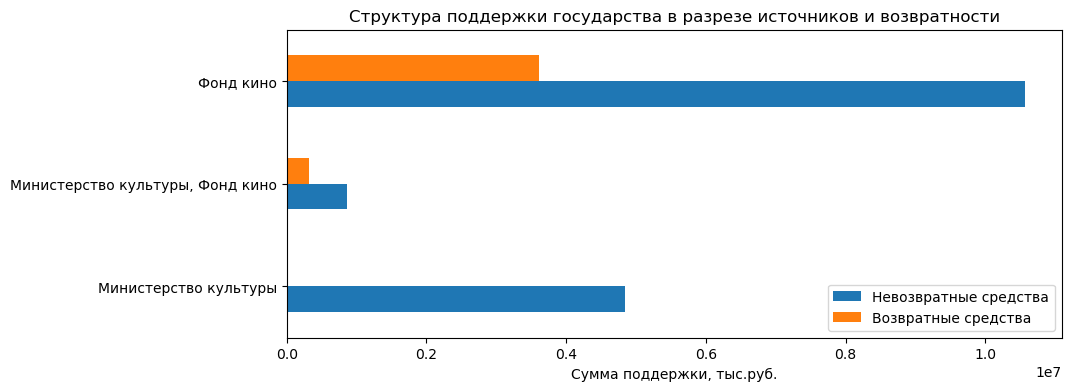

In [100]:
data_gov_fin.pivot_table(index='financing_source',
                         values=['refundable_support', 'nonrefundable_support'],
                         aggfunc='sum').\
plot(kind='barh', figsize=(10,4))
plt.ylabel('')
plt.xlabel('Сумма поддержки, тыс.руб.')
plt.title('Структура поддержки государства в разрезе источников и возвратности')
plt.legend(['Невозвратные средства', 'Возвратные средства'])
plt.show();

По источникам средства господдержки на 70% поступают от Фонда кино. При этом совместно с Минкультуры фильмы финансируются на 6%. Остальные средства предоставляет Минкультуры. В то же время, Минкультуры финансирует картины, как правило, только на безвозмездной основе. Невозвратные средства составляют основу господдержки в целом.

8. Проанализируем объемы финансирования государством в разрезе возрастных ограничений к просмотру.

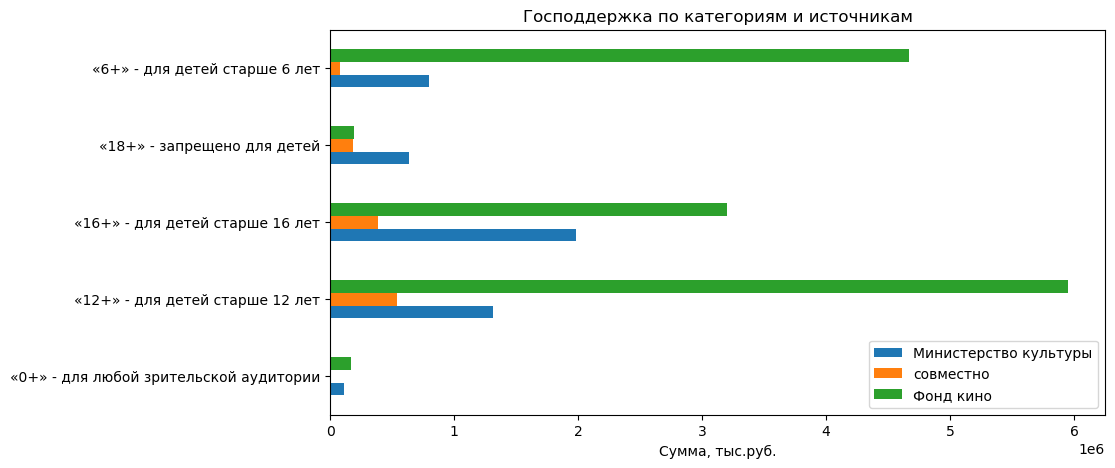

In [101]:
data_gov_fin.pivot_table(index='age_restriction',
                         columns='financing_source',
                         values='gov_support',
                         aggfunc='sum').\
plot(kind='barh', figsize=(10,5))
plt.ylabel('')
plt.xlabel('Сумма, тыс.руб.')
plt.title('Господдержка по категориям и источникам')
plt.legend(['Министерство культуры', 'совместно', 'Фонд кино'])
plt.show();

Основаная масса средств господдержки приходится на фильмы 12+. При этом в исследовании на этапе анализа кассовых сборов было выявлено, что категория 16+ принесла наибольший доход, а категория 12+ была на втором месте.
Однако по источникам видно, что Министерство культуры финансирует фильмы 16+ в большей степени, чем остальные.

9. Рассмотрим, существуют ли взаимосвязи таких показателей эффективности кинопроизводства, как рейтинги и окупаемость, в категории фильмов с господдержкой, и параметров финансирования.

1. Рассмотрим диаграмму рассеяния рейтингов и доли господдержки в бюджете фильмов. Как видно из графика ниже, подобная связь не прослеживается.

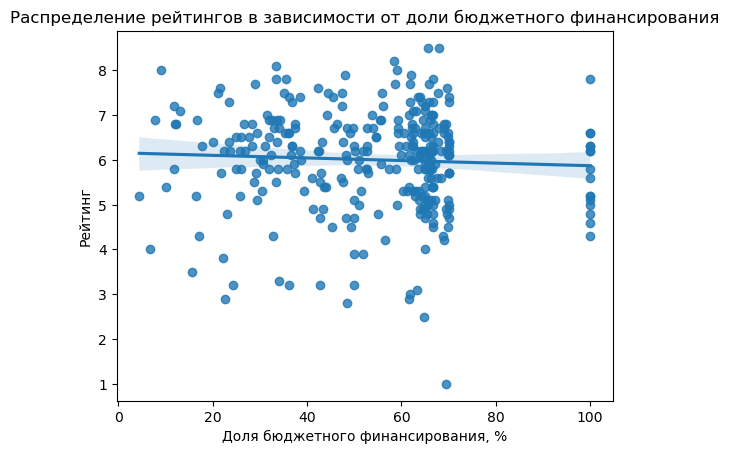

In [102]:
seaborn.regplot(data=data_gov_fin, x='gov_funds_percent', y='ratings', scatter=True)
plt.title('Распределение рейтингов в зависимости от доли бюджетного финансирования')
plt.xlabel('Доля бюджетного финансирования, %')
plt.ylabel('Рейтинг')
plt.show();

2. Рассмотрим диаграмму рассеяния окупаемости и доли господдержки в бюджете фильмов. Как видно из графика ниже, подобная связь также отсутствует.

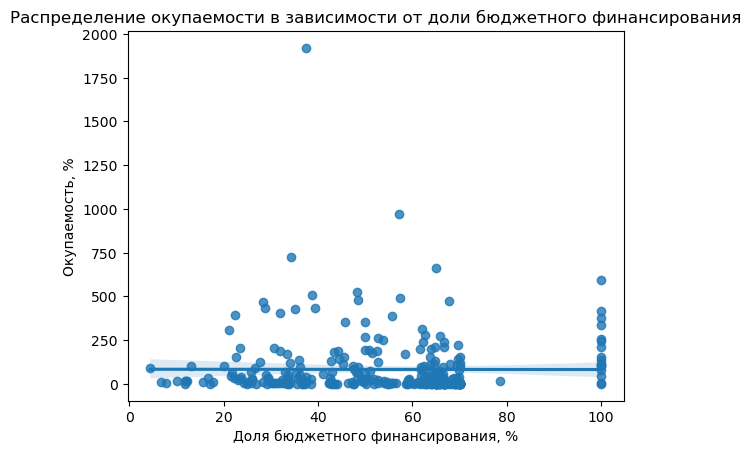

In [103]:
seaborn.regplot(data=data_gov_fin,
                x='gov_funds_percent',
                y='gov_payback',
                scatter=True)
plt.title('Распределение окупаемости в зависимости от доли бюджетного финансирования')
plt.xlabel('Доля бюджетного финансирования, %')
plt.ylabel('Окупаемость, %')
plt.show();

3. Рассмотрим диаграмму рассеяния рейтинга и окупаемости фильмов. Как видно из графика ниже, линейная зависимость не прослеживается. В то же время есть повод для дальнейшего анализа указанной зависимости, поскольку на графике после роста наблюдается снижение окупаемости начиная с рейтинга 6.5.

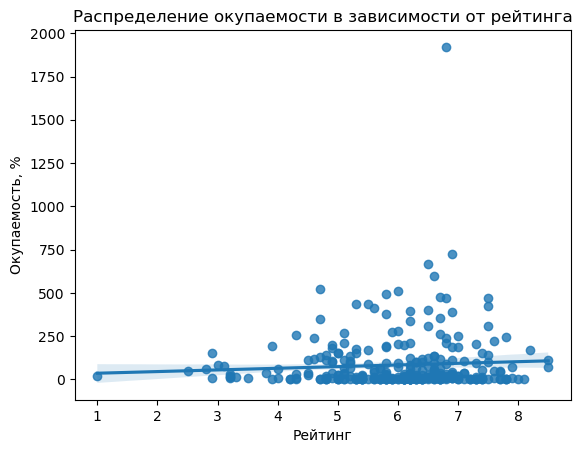

In [104]:
seaborn.regplot(data=data_gov_fin,
                x='ratings',
                y='gov_payback',
                scatter=True)
plt.title('Распределение окупаемости в зависимости от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Окупаемость, %')
plt.show();

4. Кроме того, проанализируем зависимость окупаемости и доли возмездного бюджетного финансирования в общем объеме госсредств, поскольку данная связь означала бы влияние характера господдержки на эффективность расходования средств.

In [105]:
data_gov_fin['gov_refund_share'] = round((data_gov_fin['refundable_support']/
                                          (data_gov_fin['refundable_support']+
                                           data_gov_fin['nonrefundable_support'])
                                         )*100,2)

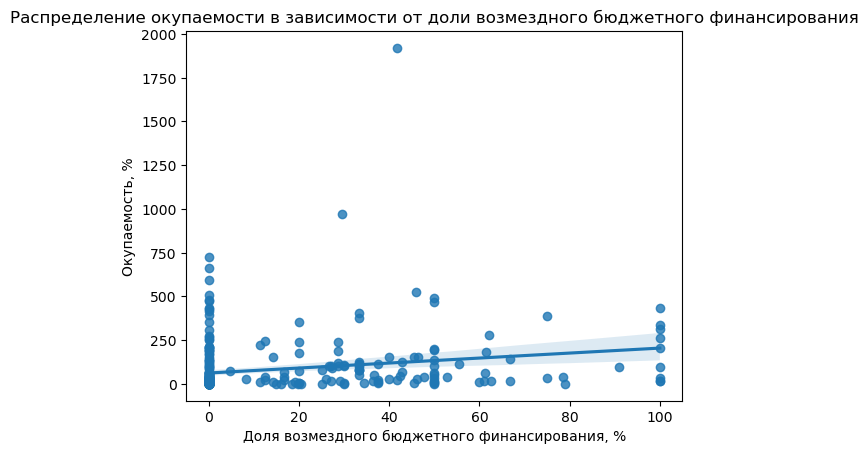

In [106]:
seaborn.regplot(data=data_gov_fin,
                x='gov_refund_share',
                y='gov_payback',
                scatter=True)
plt.title('Распределение окупаемости в зависимости от доли возмездного бюджетного финансирования')
plt.xlabel('Доля возмездного бюджетного финансирования, %')
plt.ylabel('Окупаемость, %')
plt.show();

Как видно из графика выше, существует некоторый положительный тренд в распределении данных. Проверим силу корреляции данных.

In [107]:
round(data_gov_fin['gov_payback'].corr(data_gov_fin['gov_refund_share']),2)

0.21

Значение корреляции 0.21 говорит о наличии довольно слабой связи между окупаемостью и долей господдержки, подлежащей возврату. И хотя нельзя с уверенностью утверждать о наличии причинно-следственной связи, но в целом такая картина отражает логику поведенческой экономики: когда средства даются безвозмездно, ответственность за их расходование (а значит, эффективность) снижается, несмотря на присутствие контролей со стороны государства.

**Выводы**

В ходе исследования фильмов, получивших господдержку, мы убедились, что распределение финансовой помощи неравномерно: отдельные фильмы получают средства, в 15 раз превышающие помощь основной массы фильмов.

Основные жанровые направления господдержки - это драма, комедия, мультфильм. Такой популярный и высокорейтинговый жанр кинопроката, как документальное кино, остался без существенного внимания государства.

Среднее значение рейтинга фильмов с господдержкой ниже (6.0), чем у фильмов с частным финансированием, что прослеживается на протяжении периода с 2014 по 2019 годы. Однако в целом по основным жанровым направлениям рейтинг отражает рыночный уровень симпатий кинолюбителей, немного отличаясь в меньшую сторону. Уровень рейтингов не зависит от доли государственной поддержки в бюджете кинофильмов.

Окупаемость фильмов с господдержкой представлена большим разбросом данных со средним медианным значением на уровне 17.65%. Уровень окупаемости не зависит от доли государственной поддержки в бюджете кинофильмов, однако наблюдается слабая положительная корреляция с долей возмездной господдержки.

## Выводы и рекомендации

В ходе исследования мы изучили рынок кинопроката и выявили следующие тренды и закономерности.

- На основе имеющихся данных мы пришли к выводу, что период с 2015 по 2019 год наиболее репрезентабелен для целей количественного анализа и в дальнейшем делали выводы на этой основе.
- Наибольший объем кассовых сборов наблюдался в 2018 году (около 50 млрд.рублей), меньше всего сборы составляли 40 млрд.рублей в 2015 году.
- За рассматриваемый период наибольшие кассовые сборы приходятся на категорию возрастного ограничения 16+ как самую многочисленную зрительскую аудиторию. В то же время, в разрезе лет картина меняется в зависимости от количества выходящих в прокат фильмов, а также от того, насколько успешны сами картины.

В ходе исследования фильмов, получивших господдержку, мы убедились, что:
- Распределение финансовой помощи неравномерно: отдельные фильмы получают средства, в 15 раз превышающие помощь основной массы фильмов.
- Основные жанровые направления господдержки - это драма, комедия, мультфильм. Такой популярный и высокорейтинговый жанр кинопроката, как документальное кино, не финансировался государством. По источникам средства господдержки на 70% поступают от Фонда кино. 24% предоставляет Минкультуры, остальное - совместно. Минкультуры финансирует картины, как правило, только на безвозмездной основе. Основаная масса средств господдержки приходится на фильмы 12+. При этом Министерство культуры финансирует фильмы 16+ в большей степени, чем остальные, что соотносится с рыночными трендами по массовости кассовых сборов.
- Средний рейтинг фильмов с господдержкой ниже, чем у фильмов с частным финансированием. Однако в целом по основным жанровым направлениям рейтинг отражает рыночный уровень симпатий кинолюбителей, немного отличаясь в меньшую сторону. Уровень рейтингов не зависит от доли государственной поддержки в бюджете кинофильмов.
- Окупаемость фильмов с господдержкой представлена большим разбросом данных со средним медианным значением на уровне 17.65%. Основая доля картин не достигла окупаемости. Уровень окупаемости не зависит от доли государственной поддержки в бюджете кинофильмов, однако наблюдается слабая положительная корреляция с долей возмездной господдержки.

В ходе исследования мы сформировали следующие рекомендации заказчику (Минкультуры):

- Включить жанр высокорейтингового документального кино в программу господдержки.
- Рассмотреть возможность возвратного финансирования кино, которое позволило бы увеличить объемы господдержки в целом, а также мотивировать кинопроизводителей расходовать средства наиболее эффективно и выходить на окупаемость.